In [ ]:
# Functions to create patterns
# function to create pixel field
# function to transform pixel rgb values to to pattern value (0-100%)
# apply pattern value to create pattern 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, Point
from shapely.affinity import translate, rotate
from geopandas import GeoSeries

In [1]:
from src.pattern_fill_value import calc_color_distance
from src.pattern_fill_value import color_distance_to_pattern_fill_value
from src.pattern_fill_value import rgb_to_pattern_fill_value

from src.create_hex_grid import create_hex_grid
from src.create_shaded_grid import create_shaded_grid
from src.create_circle_segments import create_circle_segments
from src.create_circle_rays import create_circle_rays



# Create Hexagon grid

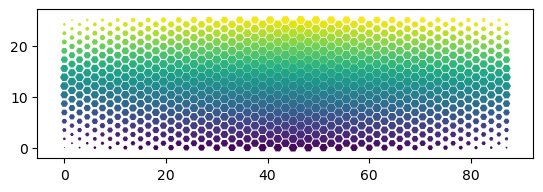

In [2]:
poly = create_hex_grid(nrows=30, ncols=30, angle=0)

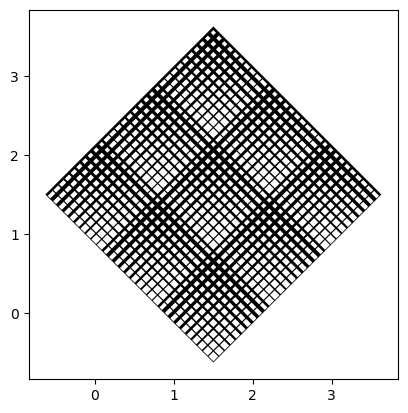

In [3]:
poly = create_shaded_grid()

In [ ]:
from shapely.geometry import Polygon, MultiPolygon
from shapely.affinity import translate, rotate
import geopandas as gpd

# create grid with repeating increasing width
def create_flex_grid_shader(
        angle:float=45, 
        scale:float=1,
        origin:tuple=(0,0), 
        nreps_h:int=3, 
        nreps_v:int=3, 
        ncols:int=11, 
        nrows:int=11, 
        plot:bool=True
        )->MultiPolygon:
    dx,dy = 1*scale,1*scale
    w=0.01
    lines = []
    def get_thickness (n,N,w=w):
        return w*(1+5*n/N)
    
    for k in range(nreps_h):
        for n in range(nreps_v):
            for i in range(ncols):
                prg = i/(ncols-1)
                thickness = get_thickness(i, ncols)
                x1 = min(prg+.5*thickness, 1+.5*w)*dx
                x2 = max(prg-.5*thickness, (i-1)/(ncols-1))*dx
                lines.append(Polygon([
                    (x1+k*dx, (1+.5*w)*dy+n*dx),
                    (x1+k*dx, (0-.5*w)*dy+n*dx),
                    (x2+k*dx, (0-.5*w)*dy+n*dx),
                    (x2+k*dx, (1+.5*w)*dy+n*dx)
                    ]))
                
            for j in range(nrows): 
                prg = j/(nrows-1)
                thickness = get_thickness(j, nrows)
                y1 = max(prg-.5*thickness, 0-.5*w)*dy
                y2 = min(prg+.5*thickness, 1+.5*w)*dy
                lines.append(Polygon([
                    ((0-.5*w)*dx+k*dx, y1+n*dy),
                    ((1+.5*w)*dx+k*dx, y1+n*dx),
                    ((1+.5*w)*dx+k*dx, y2+n*dx),
                    ((0-.5*w)*dx+k*dx, y2+n*dx)
                    ]))
            
            
    poly = gpd.GeoSeries(lines).unary_union
    poly = rotate(poly,angle)

    if plot:
        # gpd.GeoSeries(lines).plot(cmap='viridis', alpha=.5)
        gpd.GeoSeries([poly]).plot(color='black')
    
    return poly

<Axes: >

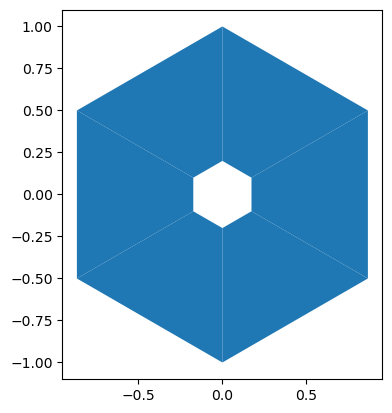

In [5]:
n = 6
GeoSeries([Polygon([
    (0,0),
    (math.sin(i/n * 360 * math.pi / 180 ), math.cos(i/n * 360 * math.pi / 180 )),
    (math.sin((i+1)/n * 360 * math.pi / 180 ), math.cos((i+1)/n * 360 * math.pi / 180 ))
    ]) for i in range(n)]).difference(
        Polygon([(.2*math.sin((i+1)/n * 360 * math.pi / 180 ), .2*math.cos((i+1)/n * 360 * math.pi / 180 ))
        for i in range(max(n,2))])
        ).plot()

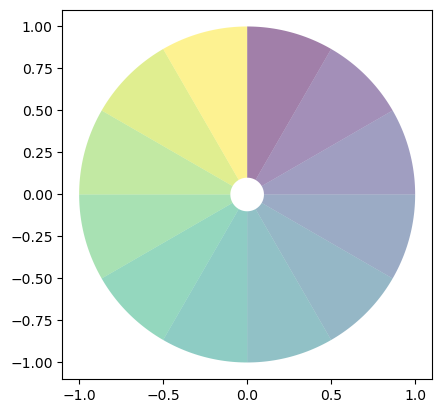

In [2]:
poly = create_circle_segments(12,circle=0.1, every_nth=[], remove_or_keep='remove')

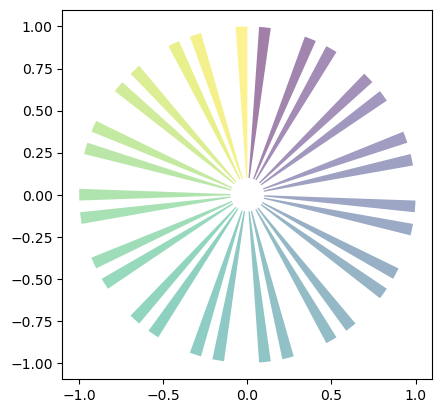

In [ ]:
poly = create_circle_segments(90,circle=0.1, every_nth=[2,3], remove_or_keep='remove')

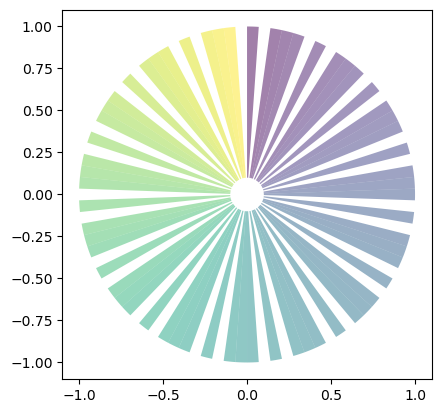

In [7]:
poly = create_circle_segments(90,circle=0.1, every_nth=[2,3], remove_or_keep='keep', angle=0)

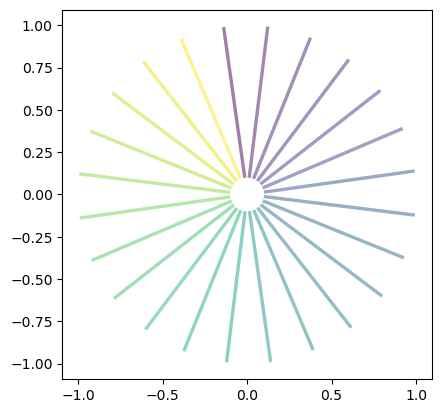

In [24]:
poly = create_circle_rays(24, diff=True, circle=0.1, width=0.02, angle=8)

<Axes: >

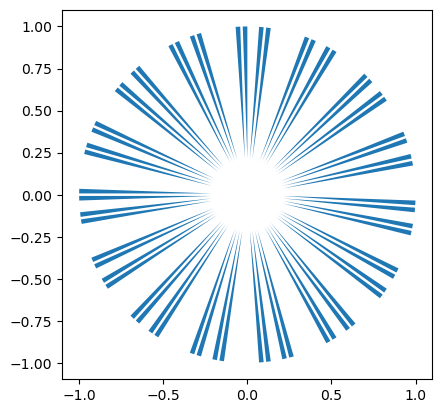

In [27]:
n=90
GeoSeries([
    create_circle_segments(n,circle=0.0, every_nth=[2,3], remove_or_keep='remove',plot=False).difference(
        create_circle_rays(n, diff=True, circle=0.0, width=0.015, angle=360/n/2, plot=False)
        )
    ]).plot()

In [ ]:
def add_and_substract_patterns(
        add:list,
        substract:list=[]
)->Polygon:
    add 
    return 

<Axes: >

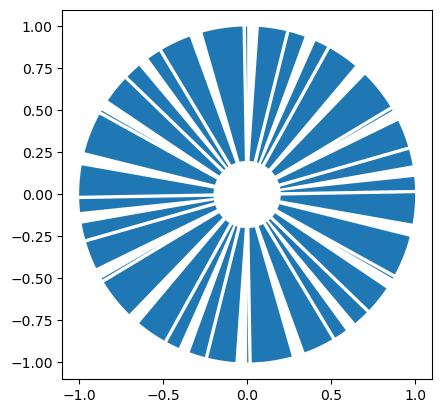

In [23]:
GeoSeries([
    create_circle_segments(90,circle=0.2, every_nth=[5], remove_or_keep='remove',plot=False).difference(
        create_circle_rays(24, diff=True, circle=0.1, width=0.02, angle=1, plot=False)
        )
    ]).plot()